<a href="https://colab.research.google.com/github/akshatjain1004/Denoising-and-Deblurring-of-a-signal/blob/main/SNS_Programming_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SNS PROGRAMMING ASSIGNMENT**

**GROUP MEMBERS:**

**1.** Dev Goel (B20CH013)   
**2.** Akshat Jain (B20CI008)

# **Importing Libraries and Processing Data**

In [ ]:
import pandas as pd             # Library For The Python Programming Language (To Read Data And Data Analysis).
import matplotlib.pyplot as plt # (Plotting) Library For The Python Programming Language.
import numpy as np              # Library For The Python Programming Language.

# Reading [data.csv] File
data = pd.read_csv("data.csv")

# Defining Data Frames x[n], y[n], n.
df = pd.DataFrame(data[['x[n]','y[n]','n']])

# Forming Array To Store All The Values Of x[n], y[n], n.
x= np.array((df['x[n]']))
y= np.array((df['y[n]']))
n= np.array((df['n']))

# **Plotting Of x[n] v/s n**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

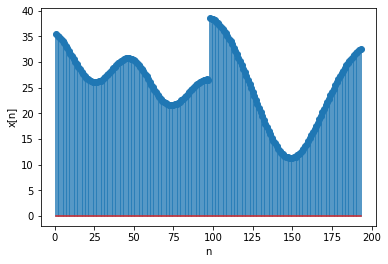

In [ ]:
# Plotting Of x[n] v/s n
plt.xlabel('n')           # label x axis
plt.ylabel('x[n]')        # label y axis
plt.stem(n,x)

# **Plotting Of y[n] v/s n**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

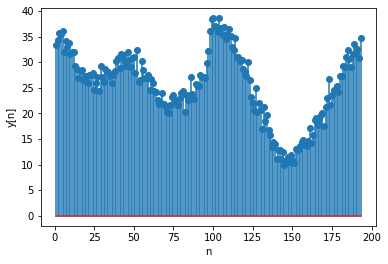

In [ ]:
# Plotting Of y[n] v/s n
plt.xlabel('n')
plt.ylabel('y[n]')
plt.stem(n,y)

# **METHOD - I Implementation**
# - First Remove Noise And Then Sharpen (Deblur). Let The Resulting Signal Be x1[n] 

# **Denoising First**

In [ ]:
# -------------------------------  DENOISING -----------------------------------

# Defining Function To Denoise The Signal.
def denoise(y):
  z = [(y[0]+y[0]+y[0]+y[1]+y[2])/5]         # Storing The Values At Edges.
  z.append((y[0]+y[0]+y[1]+y[2]+y[3])/5)
  # Loop To Denoise The Signal (Running For All The Readings Except Ones At Edges/Boundaries).
  for i in range(2,len(y)-2):
    sum = (y[i-2] + y[i-1] + y[i]+ y[i+1] + y[i+2])/5
    z.append(sum)
  z.append((y[-1]+y[-1]+y[-2]+y[-3]+y[-4])/5)
  z.append((y[-1]+y[-1]+y[-1]+y[-2]+y[-3])/5)     # Storing The Values At Edges.
  return z                                        # Returning Denoised Array

# (denoise_1) We Are Denoising The Signal First.
denoise_1= denoise(y)

# Printing Denoised y[n] Readings.
print("--> Denoised Readings")
print(len(denoise_1))
print(denoise_1)

--> Denoised Readings
193
[34.04926, 34.49194, 35.03376000000001, 34.739979999999996, 34.69718, 34.12488, 33.754400000000004, 32.87872, 32.907239999999994, 32.474239999999995, 31.738239999999998, 30.717899999999997, 29.75286, 28.99022, 28.281799999999997, 27.731060000000003, 27.46404, 27.361720000000002, 26.91542, 26.73872, 26.942539999999997, 27.056420000000003, 26.69594, 26.689160000000005, 26.61416, 26.01256, 26.307439999999996, 26.809819999999995, 26.85366, 27.16962, 27.900739999999995, 27.643880000000003, 27.676740000000002, 27.63868, 27.385559999999998, 27.42156, 27.85398, 28.5543, 29.145220000000002, 29.949040000000004, 30.58202, 30.62534, 30.33766, 30.951099999999997, 30.7435, 30.27092, 30.34452, 30.68218, 29.844079999999998, 30.22186, 29.63058, 28.76874, 28.616480000000003, 28.7395, 27.63234, 27.796780000000002, 27.997020000000003, 26.876480000000004, 26.533459999999998, 26.340459999999997, 25.80612, 25.142200000000003, 24.72482, 23.74116, 22.99332, 22.91394, 22.43682, 22.1837

# **Plotting the Denoised Signal**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

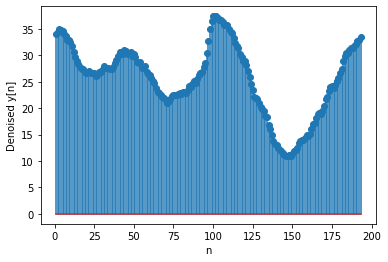

In [ ]:
# Plotting The Denoised Signal.
plt.xlabel('n')
plt.ylabel('Denoised y[n]')
plt.stem(n, denoise_1)

# **Deblurring the Denoised Signal**

In [ ]:
# -------------------------------  DEBLURRING ----------------------------------

import cmath
import math
pi= math.pi
e= math.e

# Defining Function For Finding Discrete-Time Fourier Transform which has two input arguments.
def dtft(y,w):
  X=0
  for n in range(len(y)):
    X+= y[n]*e**(complex(0,-w*n))   # Formula of DTFT
  return X

# Defining Function For Finding Approximation of Discrete-Time Fourier Transform.
def approx_dtft(y):
  X=[]
  for k in range(len(y)):
    X.append(dtft(y,2*pi*k/(len(y))))   # len(y) (in formula) is no. of divisions in which we are dividing w from 0-2pi
  return X

# **Implementing DTFT of Denoised Signal and Plotting It**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<StemContainer object of 3 artists>

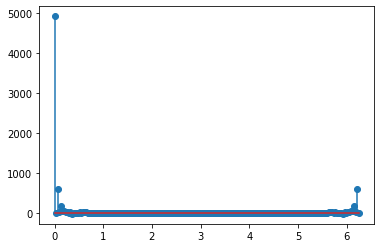

In [ ]:
Yk= approx_dtft(denoise_1)
W=[]
# Taking Discrete values of frequency.
for k in range(len(y)):
  W.append(2*pi*k/(len(y)))
plt.stem(W,Yk)

# **Implementing DTFT of h[n] and Plotting It**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<StemContainer object of 3 artists>

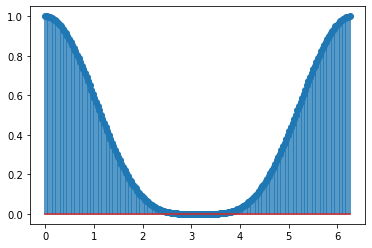

In [ ]:
h=[1/16,4/16,6/16,4/16,1/16]         # Given impulse response
j=complex(0,1)
# Defining DTFT for impulse response.
def discrete_fourier_transform_for_h(sl,w):
    sum=0
    for i in range(0,len(sl),1):
      sum+=sl[i]*np.exp(-(i-2)*j*w)
    return sum

h_jw=[]
# Applying the concept of approximation of DTFT.
for i in range(len(y)):
  h_jw.append(discrete_fourier_transform_for_h(h,2*i*np.pi/len(y))) 
plt.stem(W,h_jw)

# **Deblurring the Denoised Signal (in frequency domain) and Plotting It**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[(4915.45426+0j), (-9.049183752997271-434.9470716386477j), (583.6687367436688-305.64977269462054j), (19.281735455433967+438.81960816769936j), (157.39232794849954-87.24313586015369j), (42.77529479968638-3.793186731850637j), (34.493901754169684-62.73625155527456j), (8.786251879938646+48.08309929910205j), (7.335146360177464-51.52213009371207j), (-3.2488567640017125+8.159171263197011j), (22.48799484249063-36.58951614418284j), (-31.935000011323773+12.935463967357402j), (-10.30275751521978-20.447831437936312j), (2.2727457056604026+10.959201567087339j), (-4.8967101857780335-26.379723099238536j), (-7.779913846408523-0.5377148330280629j), (9.720825162232943-17.02550876634854j), (-15.327666622113421+16.63419161377977j), (17.551028581844232-23.377757963656425j), (22.008681352131617+11.516895867133618j), (16.985966836789398-9.097667311944205j), (2.479769133953035+3.3991291138530175j), (-9.766193060623428+0.8936778200881693j), (-8.261906713447885+12.05484297002386j), (-0.47954256282430147-8.7171344

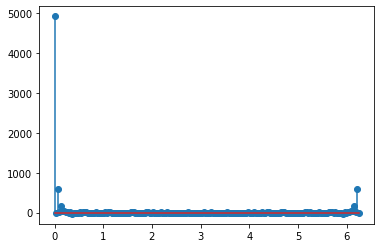

In [ ]:
deblur_1w=[]
for k in range(len(y)):
  if h_jw[k]<0.35:                 # We have put an upper limit of 0.35 as the h(jw) contained some values near to 0 so when we put these values in denominator the result will tend to very large values so we can alter that values in order to get better outcome!!
    deblur_1w.append(Yk[k]/0.35)
  else:
    deblur_1w.append((Yk[k])/h_jw[k])
plt.stem(W,deblur_1w)

print(deblur_1w)

# **Implementing Inverse DTFT to get x1[n] from x1(e^jw) and Comparing it to x[n] graphically**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


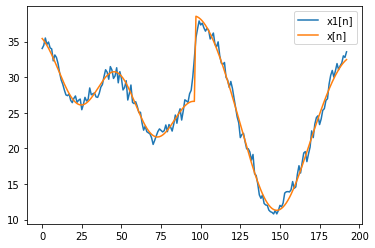

In [ ]:
# Defining Function For Finding Inverse of Discrete-Time Fourier Transform.
def inverse_dtft(Yk):
  global W
  output=[]
  for n in range(len(Yk)):
    sum=0
    for r in range(len(Yk)):
      sum+= ((Yk[r]*e**complex(0,W[r]*n)))/len(y)  # Formula for calculating Inverse DTFT
    output.append(sum)
  return output

deblur_1n= inverse_dtft(deblur_1w)
plt.plot(deblur_1n, label='x1[n]')
plt.plot(x, label='x[n]')
plt.legend()

In [ ]:
df[['x1[n]']] = deblur_1n

In [ ]:
for i in range(len(deblur_1n)):
 deblur_1n[i] = deblur_1n[i].real
df[['x1[n]']] = deblur_1n

# **METHOD - II IMPLEMENTATION**
# - First Sharpen (Deblur) And Then Remove Noise. Let The Resulting Signal Be x2[n].

# **Deblurring y[n] by Calling Above Defined Functions**

# **Plotting the DTFT of y[n]**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<StemContainer object of 3 artists>

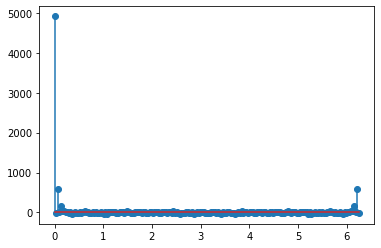

In [ ]:
Yk2= approx_dtft(y)
plt.stem(W,Yk2)

# **Deblurring y[n] (in frequency domain) and Plotting It**

In [ ]:
# -------------------------------  DEBLURRING ----------------------------------
Yk= approx_dtft(y)
W=[]
# Taking Discrete values of frequency.
for k in range(len(y)):
  W.append(2*pi*k/(len(y)))

deblur_2w=[]
for k in range(len(y)):
  if h_jw[k]<0.35:
    deblur_2w.append(Yk[k]/0.35)
  else:
    deblur_2w.append((Yk[k])/h_jw[k])

# **Taking the Inverse DTFT of the Deblurred Signal to get the signal in time domain**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


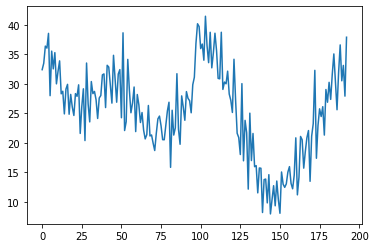

In [ ]:
# Taking Inverse by calling above defined functions
deblur_2n= inverse_dtft(deblur_2w)
plt.plot(deblur_2n)

# **Denoising the Deblurred Signal and Comparing It with x[n] Graphically**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


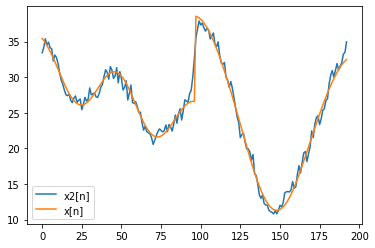

In [ ]:
# -------------------------------  DENOISING -----------------------------------
denoise_2= denoise(deblur_2n)

plt.plot(denoise_2, label='x2[n]')
plt.plot(x, label='x[n]')
plt.legend()

In [ ]:
df[['x2[n]']] = denoise_2

In [ ]:
for i in range(len(denoise_2)):
  denoise_2[i] = denoise_2[i].real
df[['x2[n]']] = denoise_2

# **Comparison between x[n], x1[n] and x2[n]**

**The Difference between x[n] and x1[n]**

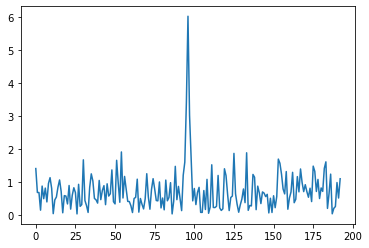

In [ ]:
plt.plot(abs(deblur_1n-x))

**The Difference between x[n] and x2[n]**

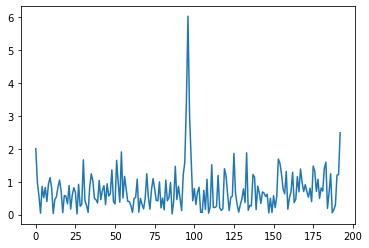

In [ ]:
plt.plot(abs(denoise_2-x))

In [ ]:
print(df)

        x[n]     y[n]    n      x1[n]      x2[n]
0    35.4312  33.3735    1  34.031982  33.428884
1    35.1511  34.3744    2  34.476859  34.160934
2    34.8284  35.7514    3  35.501016  35.391677
3    34.4656  35.5869    4  34.603344  34.510767
4    34.0656  36.0826    5  34.934034  34.920315
..       ...      ...  ...        ...        ...
188  31.4198  33.5967  189  31.612465  31.570600
189  31.7396  31.7135  190  31.988088  32.031654
190  32.0228  32.6819  191  32.998526  33.220938
191  32.2673  30.9260  192  32.773135  33.481248
192  32.4714  34.7257  193  33.562125  34.957760

[193 rows x 5 columns]


# **Which method is more accurate?**

# **Using The Process Of "Mean Square Error"**

**Calculating Mean Square Error For Method I**

In [ ]:
mse1 = 0
for i in range(193):
  mse1 += ((deblur_1n[i] - x[i])**2) # Formula for calculating MSE

mse1 = mse1/len(y)
print(abs(mse1))

0.9267337063157449


**Calculating Mean Square Error For Method II**

In [ ]:
mse2 = 0
for i in range(193):
  mse2 += (denoise_2[i]- x[i])**2 # Formula for calculating MSE

mse2 = mse2/len(y)
print(abs(mse2))

0.9742072885799745
